In [1]:
import sys, os
# ref 这波是改工作目录，默认为ipynb文件所在目录
os.chdir(os.path.abspath('..'))
print(os.getcwd())

e:\Programming\Python\project_GeoNeuro\project_moires\spatial_cognition_moire


In [2]:
sys.path

['e:\\Programming\\Python\\project_GeoNeuro\\project_moires\\spatial_cognition_moire\\Analysis',
 'd:\\Application\\Conda\\envs\\geoneuro\\python39.zip',
 'd:\\Application\\Conda\\envs\\geoneuro\\DLLs',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib',
 'd:\\Application\\Conda\\envs\\geoneuro',
 '',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages\\win32',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages\\win32\\lib',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages\\Pythonwin']

In [3]:
import shap
# ref 和Python文件不一样，jupyter会自动检索工作目录的模块，如果存在则自动添加到sys.path中，不需要手动添加
import packFuncForShap as pack4shap
sys.path

['e:\\Programming\\Python\\project_GeoNeuro\\project_moires\\spatial_cognition_moire\\Analysis',
 'd:\\Application\\Conda\\envs\\geoneuro\\python39.zip',
 'd:\\Application\\Conda\\envs\\geoneuro\\DLLs',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib',
 'd:\\Application\\Conda\\envs\\geoneuro',
 '',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages\\win32',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages\\win32\\lib',
 'd:\\Application\\Conda\\envs\\geoneuro\\lib\\site-packages\\Pythonwin',
 'e:\\Programming\\Python\\project_GeoNeuro\\project_moires\\spatial_cognition_moire']

In [10]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
from itertools import repeat, chain
from functools import partial

In [5]:
import importlib
importlib.reload(pack4shap)

<module 'packFuncForShap' from 'e:\\Programming\\Python\\project_GeoNeuro\\project_moires\\spatial_cognition_moire\\Analysis\\packFuncForShap.py'>

In [6]:
migration = pack4shap.migrationDate()
print(migration)
start_date = date(2019, 7, 6)
end_date = date(2019, 12, 31)

current_date = start_date
date_list = []
# 循环直到当前日期超过结束日期
while current_date <= end_date:
    current_datestr = current_date.strftime('%Y%m%d')
    current_date_int = int(current_datestr)
    date_list.append(current_date_int)
    # 将当前日期递增7天
    current_date += timedelta(days=7)

20190707


In [7]:
date_list = [20190728, 20190803, 20190810, 20190817, 20190824, 20190831, 20190907, 20190914, 
             20190921, 20190928, 20191005, 20191012, 20191019, 20191026, 20191102, 20191109, 20191116, 20191123, 20191130, 
             20191207, 20191214, 20191221, 20191228]

In [34]:
shap_calculates = dict()

for date in date_list:
    print('Iteration date: {date}'.format(date=date))
    path = './data_pe/after_migrt/model/{date}.pickle'.format(date=date)

    model = pack4shap.loadModel(path=path)
    modelPredWrapper = partial(pack4shap.modelPredict, model=model, attribute_type='reward')

    dataset = pack4shap.backgroundData(date = date)
    dataset = np.unique(dataset, axis=0)
    print('Data with {k} rows'.format(k=dataset.shape[0]))

    zero_bench = np.zeros(dataset.shape[1]).reshape(1, -1)
    mean_bench = np.mean(dataset, axis=0).reshape(1, -1)

    explainer = shap.PermutationExplainer(modelPredWrapper, zero_bench)
    shap_values = explainer(dataset)
    basevalue = shap_values.base_values.mean()
    shap_mean = np.abs(shap_values.values).mean(axis=0)
    shap_be = shap_mean[:14].sum()
    shap_pe = shap_mean[14:].sum()
    res = (basevalue, shap_be, shap_pe)

    shap_calculates[date] = res


Iteration date: 20190728
(167, 10, 2, 14) (167, 10, 2, 1) (167, 10, 2, 42)
load params from ./data_pe/after_migrt/model/20190728.pickle!
Data with 210 rows


PermutationExplainer explainer: 211it [20:27,  5.87s/it]                         


Iteration date: 20190803
(167, 10, 2, 14) (167, 10, 2, 1) (167, 10, 2, 42)
load params from ./data_pe/after_migrt/model/20190803.pickle!
Data with 224 rows


PermutationExplainer explainer: 225it [22:00,  5.95s/it]                         


Iteration date: 20190810
(167, 10, 2, 14) (167, 10, 2, 1) (167, 10, 2, 42)
load params from ./data_pe/after_migrt/model/20190810.pickle!
Data with 234 rows


PermutationExplainer explainer: 235it [22:30,  5.80s/it]                         


Iteration date: 20190817
(167, 10, 2, 14) (167, 10, 2, 1) (167, 10, 2, 42)
load params from ./data_pe/after_migrt/model/20190817.pickle!
Data with 244 rows


PermutationExplainer explainer: 245it [23:58,  5.95s/it]                         


Iteration date: 20190824
(167, 10, 2, 14) (167, 10, 2, 1) (167, 10, 2, 42)
load params from ./data_pe/after_migrt/model/20190824.pickle!
Data with 248 rows


PermutationExplainer explainer:  88%|████████▊ | 218/248 [21:26<03:18,  6.63s/it]

In [42]:
date = 20190707
path = './data_pe/after_migrt/model/{date}.pickle'.format(date=20190707)
model = pack4shap.loadModel(path=path)
modelPredWrapper = partial(pack4shap.modelPredict, model=model, attribute_type='reward')

dataset = pack4shap.backgroundData(date = date)
dataset_uni = np.unique(dataset, axis=0)
print('Data with {k} rows'.format(k=dataset_uni.shape[0]))

built_bench = np.zeros(model.s_dim).reshape(1, -1)
locat_bench = np.mean(dataset[:, model.s_dim:], axis=0).reshape(1, -1)
zero_bench = np.zeros(dataset.shape[1]).reshape(1, -1)
home_bench = np.hstack((built_bench, locat_bench))

explainer = shap.PermutationExplainer(modelPredWrapper, home_bench)
shap_values = explainer(dataset_uni)

(167, 10, 2, 14) (167, 10, 2, 1) (167, 10, 2, 42)
load params from ./data_pe/after_migrt/model/20190707.pickle!
Data with 183 rows


PermutationExplainer explainer: 184it [17:32,  5.78s/it]                         


In [45]:
varchr = 'home_distance,LU_Business,LU_City_Road,LU_Consumption,LU_Culture,LU_Industry,LU_Medical,LU_Park_&_Scenery,LU_Public,LU_Residence,LU_Science_&_Education,LU_Special,LU_Transportation,LU_Wild'
varname_BE = varchr.split(',')
varname_PE = ['PE%02d' % i for i in range(6 * len(varname_BE))]
varname = varname_BE + varname_PE
groupmap = {
    'BuiltAttr': varname[:14],
    'Location': varname[14:]
}

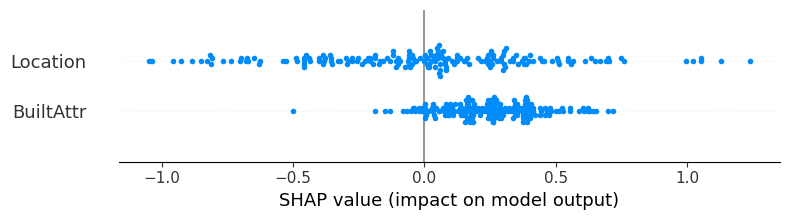

In [46]:
def grouped_shap(shap_vals, features, groups):
    revert_dict = lambda d: dict(chain(*[zip(val, repeat(key)) for key, val in d.items()]))    
    
    groupmap = revert_dict(groups)
    shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
    shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
    shap_grouped = shap_Tdf.groupby('group').sum().T
    return shap_grouped

shap_group = grouped_shap(shap_vals=shap_values.values, features=varname, groups=groupmap)
shap.summary_plot(shap_group.values, features=shap_group.columns)